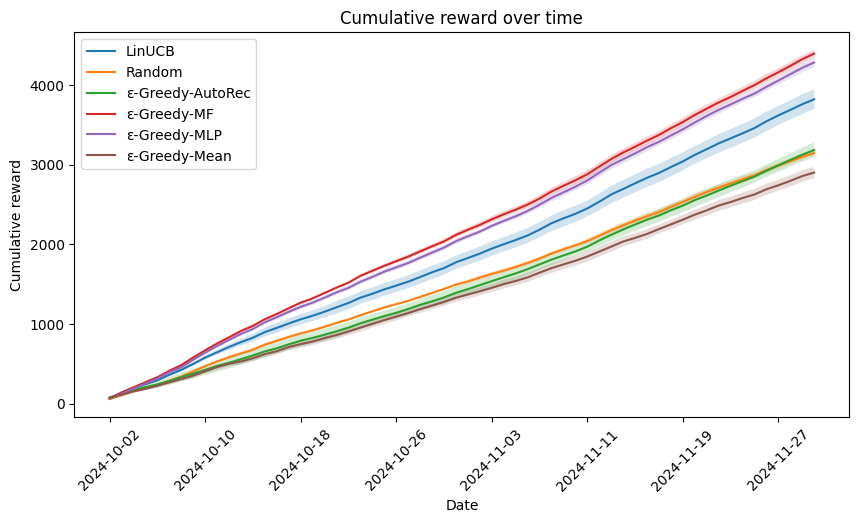

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.concat((
    pd.read_csv('./out/replay_results.csv', index_col=[0, 1]),
    pd.read_csv('./out/replay_results_baseline.csv', index_col=[0, 1]),
))

plt.figure(figsize=(10, 5))
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(10))
for name, group in df.groupby(level=0):
    plt.plot(group.index.get_level_values(1), group.mean(axis=1), label=name)
    plt.fill_between(group.index.get_level_values(1), group.mean(axis=1) - group.std(axis=1), group.mean(axis=1) + group.std(axis=1), alpha=0.2)

plt.title('Cumulative reward over time')
plt.ylabel('Cumulative reward')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.show()